## Reading the Dataset

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [67]:
import pandas as pd

review = pd.read_csv("IMDB Dataset.csv")
print(review)
print("\nDescription of Dataset is:")
review.describe()

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

Description of Dataset is:


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


The Dataset Contains 50000 rows and 2 columns. <br><br>
To train our model faster in the following steps, we’re going to take a smaller sample of 10000 rows. This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced

In [68]:
positive_review = review[review['sentiment']=='positive'][:9000]
negative_review = review[review['sentiment']=='negative'][:1000]
review_imdb = pd.concat([positive_review, negative_review])
review_imdb.value_counts(["sentiment"])

sentiment
positive     9000
negative     1000
dtype: int64

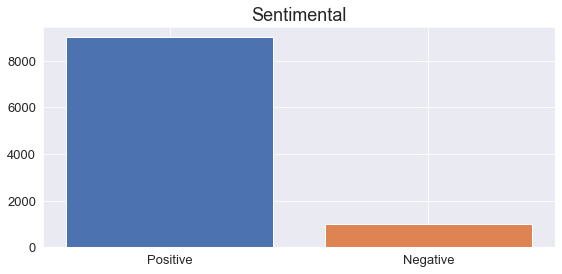

In [69]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout = True)
plt.bar(x = ["Positive", "Negative"], 
        height= review_imdb.value_counts(["sentiment"]),
        color = colors[:2])
plt.title("Sentimental")
# plt.savefig("S")
plt.show()

In [70]:
from imblearn.under_sampling import  RandomUnderSampler
random_sample = RandomUnderSampler(random_state=0)
review_imdb_bal, review_imdb_bal['sentiment'] = random_sample.fit_resample(review_imdb[['review']],
                                                                        review_imdb[['sentiment']])
review_imdb_bal


,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


In [71]:
print(review_imdb.value_counts('sentiment'))
print('\n',review_imdb_bal.value_counts('sentiment'))

sentiment
positive    9000
negative    1000
dtype: int64

 sentiment
negative    1000
positive    1000
dtype: int64


### Splitting Data into train and test

In [72]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(review_imdb_bal, test_size=0.33, random_state=42)

In [73]:
x_train, y_train = train['review'], train['sentiment']
x_test, y_test = test['review'], test['sentiment']

In [74]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((1340,), (660,), (1340,), (660,))

In [75]:
y_train.value_counts()

negative    675
positive    665
Name: sentiment, dtype: int64

# Text Representaion (Bag of Words)


### count vectorizer

In [76]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

text = ["I like to write code in Python. I do Love python code",
        "I hate writing code in C . I hate C code"]

df = pd.DataFrame({"review": ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names())
df_dtm

,code,hate,like,love,python,write,writing
review1,2,0,1,1,2,1,0
review2,2,2,0,0,0,0,1


### TfiDF

In [77]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names())
df_dtm

,code,hate,java,love,python,writing
review1,0.438501,0.000000,0.000000,0.616298,0.616298,0.21925
review2,0.438501,0.616298,0.616298,0.000000,0.000000,0.21925


### Turning our text data to numerical vectors

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
x_train_vector = tfidf.fit_transform(x_train)

# also fit the test_x_vector
x_test_vector = tfidf.transform(x_test)


# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words='english')
# x_train_vector = cv.fit_transform(x_train)
# x_train_vector = cv.transform(x_test)


In [79]:
x_train_vector

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [80]:
pd.DataFrame.sparse.from_spmatrix(x_train_vector, index = x_train.index,columns=tfidf.get_feature_names())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection
1. Supervised Lerning: Regression(Numerical Output), Classification(Discrete output)
- input: Review
- Output: Sentimental(Discrete)

2. Unsupervised Learning

## Support Vector Machines (SVM)

In [81]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(x_train_vector, y_train)
# svc.predict(x_train_vector[0])

SVC(kernel='linear')

### Testing

In [82]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))

['positive']
['positive']
['negative']


## Decision Tress

In [83]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train_vector, y_train)

DecisionTreeClassifier()

## Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_vector.toarray(), y_train)

GaussianNB()

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train_vector, y_train)

LogisticRegression()

## Model Evaluation

### Mean Accuracy
Returns the mean accufracy on the given test data and labels.

In [86]:
print("SVM Score: ", svc.score(x_test_vector, y_test))
print("Decision Tree Score: ", dec_tree.score(x_test_vector, y_test))
print("Naive-Bayes Score: ", gnb.score(x_test_vector.toarray(), y_test))
print("Logistic Regression Score: ", log_reg.score(x_test_vector,y_test))

SVM Score:  0.8409090909090909
Decision Tree Score:  0.6515151515151515
Naive-Bayes Score:  0.6348484848484849
Logistic Regression Score:  0.8303030303030303


F1-score
It is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it's useful when you have data with imbalance classes.

F1 Score  = 2(Recall Precision) / (Recall + Precision)

In [87]:
from sklearn.metrics import f1_score

f1_score(y_test, svc.predict(x_test_vector),
        labels= ['positive', 'negative'],
        average=None )

array([0.84671533, 0.83464567])

## Classification Report 
Build a text report showing the main classification metrics

In [88]:
from sklearn. metrics import classification_report

print(classification_report( y_test,
                            svc.predict(x_test_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



## Confusion Matrix
A confusion matrix is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives

In [89]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,
                            svc.predict(x_test_vector),
                            labels=['positive', 'negative'])
conf_mat

array([[290,  45],
       [ 60, 265]], dtype=int64)

## Tunning the Model

## GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

parameters =  {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5,)

svc_grid.fit(x_train_vector, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [91]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
